<a href="https://colab.research.google.com/github/CodeGurl20/CodeGurl20/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:

rows, cols = df_data.shape
print(f'This data has {rows} rows and {cols} columns')

This data has 964 rows and 9 columns


In [ ]:

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


In [ ]:
print(f'NaN values? {df_data.isna().values.any()}')
print(f'Duplicate values? {df_data.duplicated().values.any()}')

NaN values? False
Duplicate values? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.dropna(subset=['Unnamed: 0.1','Unnamed: 0', 'Organisation', 'Location','Price', 'Date', 'Detail', 'Rocket_Status', 'Mission_Status'], inplace=True)

In [ ]:
print(f'Cleaned DataFrame NaN values? {df_data.isna().values.any()}')

Cleaned DataFrame NaN values? False


## Descriptive Statistics

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
cold_war_df = df_data

In [ ]:

org_launch = cold_war_df.groupby('Organisation', as_index=False).agg({'Detail': pd.Series.count}).sort_values(by='Detail', ascending=False)

fig_a = px.bar(data_frame=org_launch, x='Organisation', y='Detail', color='Organisation')
fig_a.update_layout(title="Number of Launches by Organisation")

fig_a

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:

active_retired = cold_war_df.value_counts(subset='Rocket_Status')

df_rocket_status = pd.DataFrame(active_retired)
df_rocket_status

,count
Rocket_Status,
StatusActive,586
StatusRetired,378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = cold_war_df.value_counts(subset='Mission_Status')

df_mission_status = pd.DataFrame(mission_status)
df_mission_status

,count
Mission_Status,
Success,910
Failure,36
Partial Failure,17
Prelaunch Failure,1


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:

fig_b = px.histogram(data_frame=cold_war_df, x='Price')
fig_b

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
def get_code(country):

    country_mappings = {
    'Russia': 'RUS',
    'New Mexico': 'USA',
    'Yellow Sea': 'CN',
    'Shahrud Missile Test Site': 'IR',
    'Pacific Missile Range Facility' : 'USA',
    'Barents Sea' : 'RUS',
    'Gran Canaria': 'USA',
    }

    code = country.split(',')[-1].strip()

    try:
        if code in country_mappings:
            return country_mappings[code]

        else:
            country_code = countries.get(code)
        return country_code.alpha3
    except Exception as e:
        return None

df_data['Country_code'] = df_data.Location.apply(get_code)
cold_war_df['Country_code'] = cold_war_df.Location.apply(get_code)

df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


In [ ]:
num_launch = cold_war_df.groupby('Country_code', as_index=False).agg({'Detail': pd.Series.count})

In [ ]:

fig_c = px.choropleth(data_frame=num_launch, locations='Country_code', color= 'Detail', color_continuous_scale=px.colors.sequential.matter)

fig_c.update_layout(height=500 , width=1500, title= "Countries based on the number of launches")
fig_c

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
mission_df = cold_war_df.groupby(['Mission_Status', 'Country_code'], as_index=False).agg({'Detail': pd.Series.count})

fail_df = mission_df[mission_df.Mission_Status == 'Failure']

In [ ]:
fig_d = px.choropleth(data_frame=fail_df, locations='Country_code', color='Detail', color_continuous_scale=px.colors.sequential.matter, title='Number of Failed Launches')
fig_d

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
sun_df = cold_war_df.groupby(['Country_code', 'Organisation'], as_index=False).value_counts(subset=['Mission_Status'])

In [ ]:
fig_e = px.sunburst(data_frame=sun_df, path=['Country_code', 'Organisation'], values='count')
fig_e

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:

df_data.Price = df_data.Price.astype(str).str.replace(',', '')
df_data.Price = pd.to_numeric(df_data.Price)
price_org = df_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum})

In [ ]:
fig_f = px.line(data_frame=price_org, x='Organisation', y='Price', title='Total amount of Money Spent by Organisations by $ Millions')
fig_f

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
per_launch = df_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.mean})

In [ ]:
fig_g = px.line(data_frame=per_launch, x='Organisation', y='Price', title= "Average amount of Money spend per Launch by $ Millions")
fig_g

# Chart the Number of Launches per Year

In [ ]:

def normalize_timestamp(timestamp):
    try:
        dt = pd.to_datetime(timestamp, format='%a %b %d, %Y %H:%M %Z', utc=True)
    except ValueError:
        dt = pd.to_datetime(timestamp).tz_localize('UTC')
    return dt

df_data['Year'] = df_data.Date.apply(normalize_timestamp).dt.year
cold_war_df['Year'] = cold_war_df.Date.apply(normalize_timestamp).dt.year

per_year = cold_war_df.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
fig_h = px.bar(data_frame=per_year, x='Year', y='Detail', color='Organisation')
fig_h

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data['Month'] = df_data.Date.apply(normalize_timestamp).dt.month

per_month = df_data.groupby(['Month', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})
per_month['Rolling_ave'] = per_month.Detail.rolling(window=3, min_periods=1).mean()

per_month

,Month,Organisation,Detail,Rolling_ave
0,1,Arianespace,3,3.00
1,1,CASC,11,7.00
2,1,ILS,2,5.33
3,1,ISRO,5,6.00
4,1,JAXA,2,3.00
...,...,...,...,...
186,12,Roscosmos,3,3.67
187,12,SpaceX,10,5.00
188,12,ULA,7,6.67
189,12,US Air Force,4,7.00


In [ ]:
fig_i = px.bar(data_frame=per_month, x='Month', y='Rolling_ave', color='Organisation')

fig_i

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:

print('Chart above shows April to be the most popular for launches')

Chart above shows April to be the most popular for launches


In [ ]:
print('Chart above shows Febuary to be the least popular for launches')


Chart above shows Febuary to be the least popular for launches


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
price_over = df_data.groupby('Year', as_index=False).agg({'Price': pd.Series.mean})


In [ ]:
fig_j = px.line(data_frame=price_over, x='Year', y='Price', title="Average Price over Time in  $ Millions")
fig_j


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_10 = cold_war_df.groupby('Organisation', as_index=False).agg({'Detail': pd.Series.count}).sort_values('Detail', ascending=False).head(10)

grouped_top = cold_war_df.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

top_over_time = grouped_top[grouped_top.Organisation.isin(top_10.Organisation)]

In [ ]:

fig_k = px.bar(data_frame=top_over_time, x='Year', y='Detail', color='Organisation', title='Rocket launched over time by the Top 10 Companies')

fig_k

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
ussr_df = cold_war_df[cold_war_df.Organisation == 'RVSN USSR']
usa_df = cold_war_df[cold_war_df.Country_code == 'USA']


usa = usa_df.groupby('Year', as_index=False).agg({'Detail': pd.Series.count})
ru = ussr_df.groupby('Year', as_index=False).agg({'Detail': pd.Series.count})

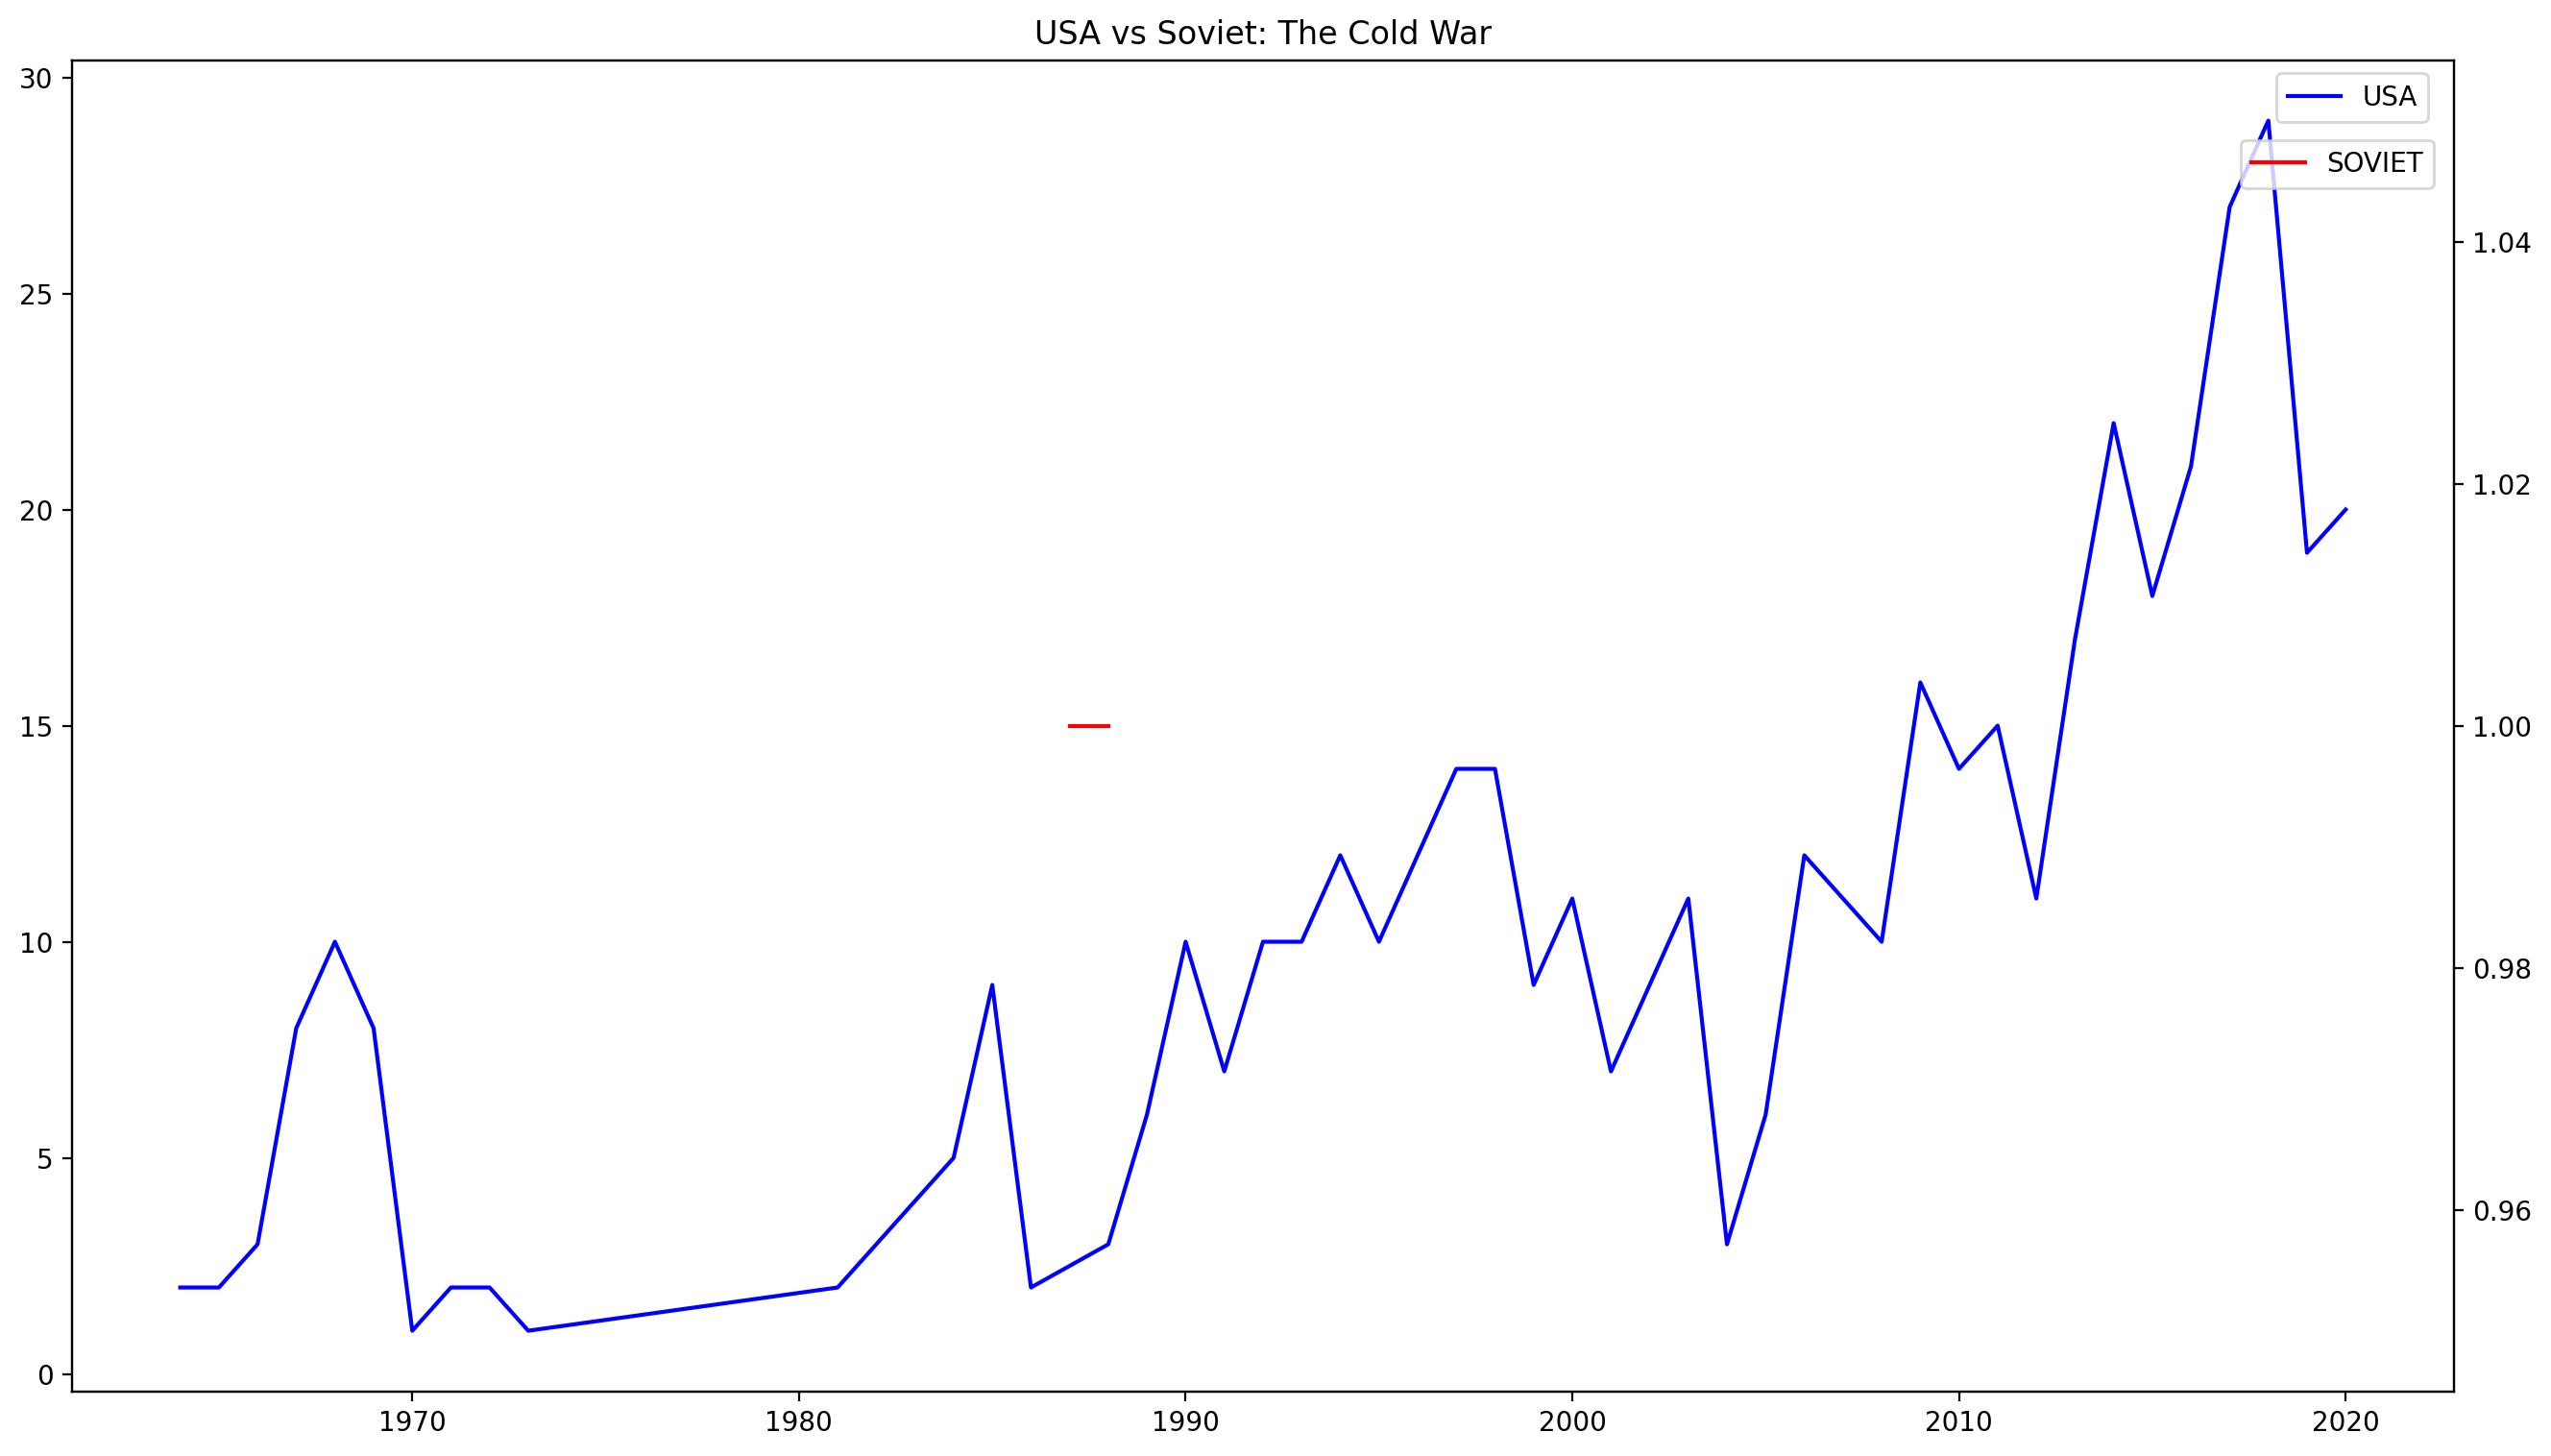

In [ ]:
plt.figure(figsize=(16, 9), dpi=200)
ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(usa.Year, usa.Detail, c='blue', label="USA")
ax2.plot(ru.Year, ru.Detail, c='red', label="SOVIET")

plt.title("USA vs Soviet: The Cold War")

ax1.legend(loc='upper left', bbox_to_anchor=(0.92, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0.905, 0.95))

plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:

usa_ru = cold_war_df[cold_war_df.Country_code.isin(['RUS', 'KAZ', 'USA'])]
group_usa_ru = usa_ru.groupby(['Country_code', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
group_usa_ru

,Country_code,Mission_Status,Detail
0,KAZ,Failure,2
1,KAZ,Partial Failure,1
2,KAZ,Success,43
3,RUS,Failure,1
4,RUS,Partial Failure,2
5,RUS,Success,51
6,USA,Failure,20
7,USA,Partial Failure,7
8,USA,Prelaunch Failure,1
9,USA,Success,462


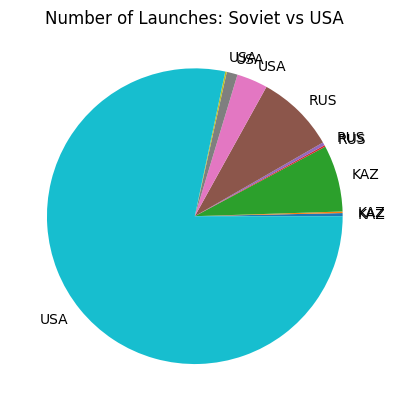

In [ ]:
plt.pie(data=group_usa_ru, x='Detail', labels='Country_code')
plt.title("Number of Launches: Soviet vs USA")
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
war_per_year = usa_ru.groupby(['Year', 'Country_code', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
war_per_year = war_per_year[war_per_year.Year <=1991]
war_per_year

,Year,Country_code,Mission_Status,Detail
0,1964,USA,Failure,1
1,1964,USA,Success,1
2,1965,USA,Success,2
3,1966,USA,Success,3
4,1967,USA,Failure,1
5,1967,USA,Partial Failure,1
6,1967,USA,Success,6
7,1968,USA,Partial Failure,1
8,1968,USA,Success,9
9,1969,USA,Success,8


In [ ]:
fig_m = px.bar(data_frame=war_per_year, x='Year', y='Detail', color='Country_code', title="Number of Launches Year by Year")
fig_m

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:

failed_laun = war_per_year[war_per_year.Mission_Status == 'Failure']

In [ ]:
fig_n = px.bar(data_frame=failed_laun, x='Year', y='Detail', color='Country_code', title="Number of Failed Launches Year by Year (Cold War Era)")
fig_n


## Chart the Percentage of Failures over Time
Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
fail = cold_war_df[cold_war_df.Mission_Status == 'Failure']
fail = fail.groupby(['Year', 'Country_code'], as_index=False).agg({'Detail': pd.Series.count})
fail

succ_lun = cold_war_df[cold_war_df.Mission_Status != 'Failure']
succ_lun = succ_lun.groupby(['Year', 'Country_code'], as_index=False).agg({'Detail': pd.Series.count})
succ_lun

fail['Percent']  = fail.Detail / succ_lun.Detail * 100

<Axes: xlabel='Year', ylabel='Percent'>

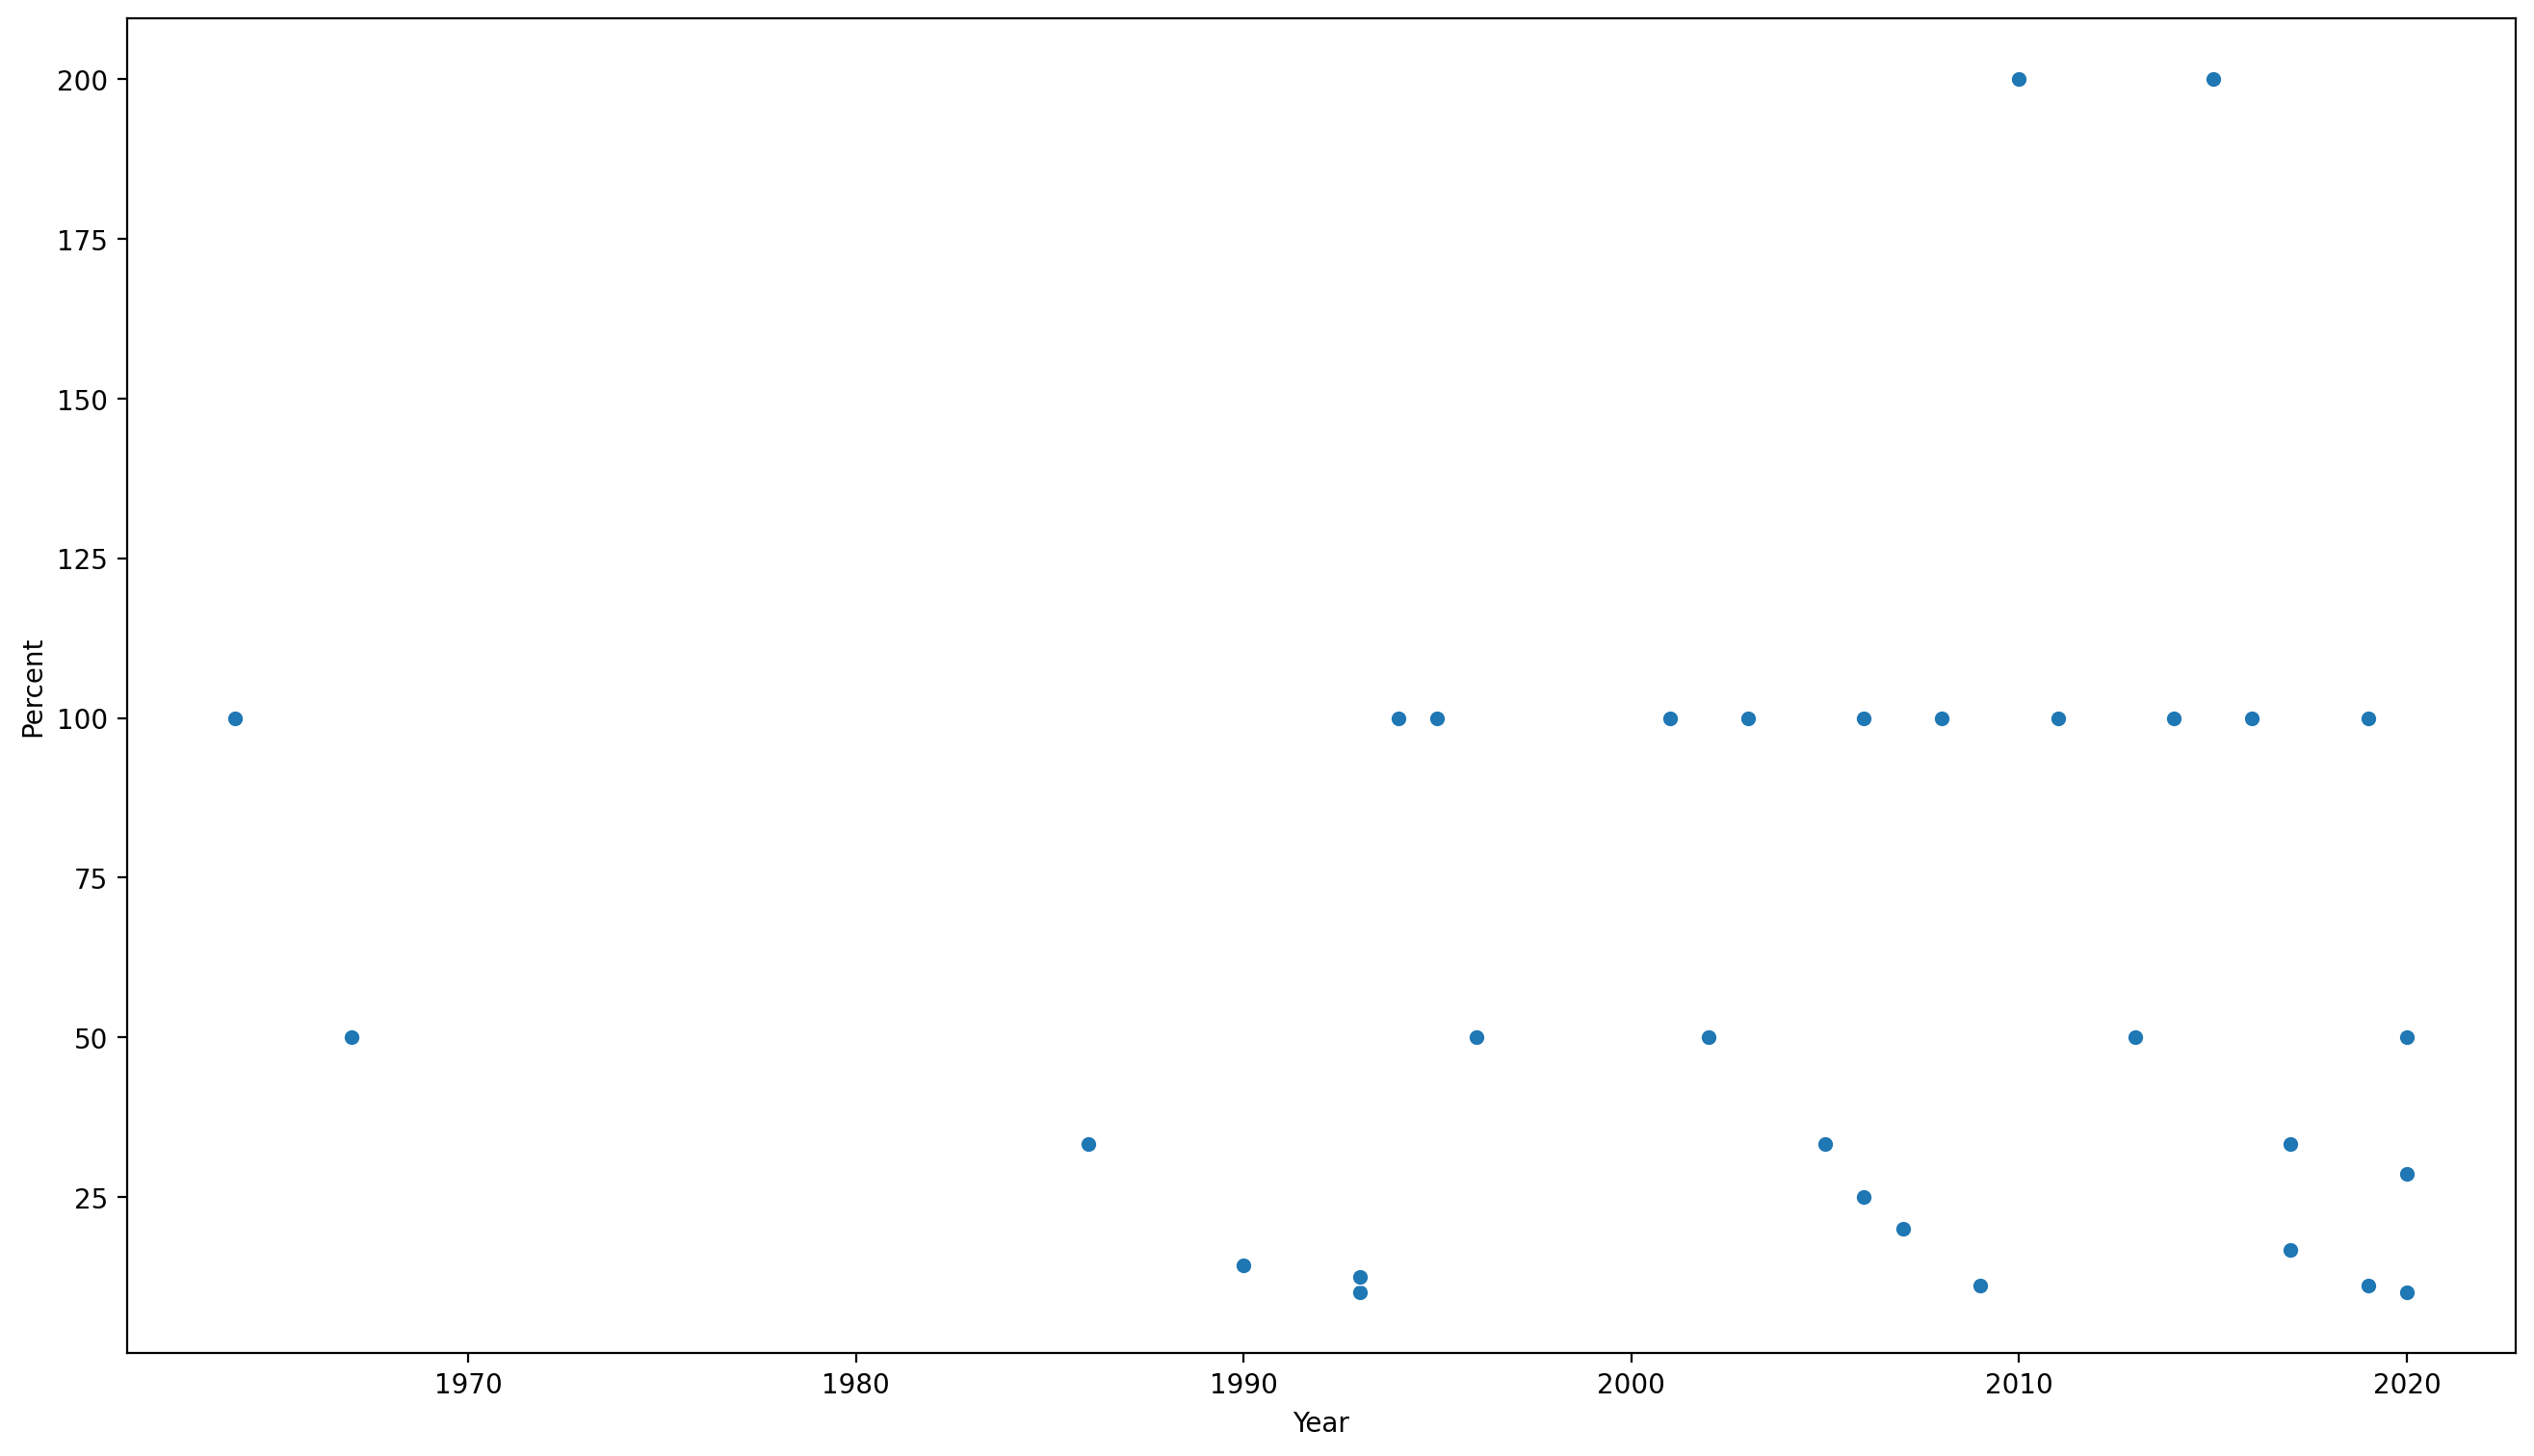

In [ ]:
plt.figure(figsize=(16, 9), dpi=200 )
sns.scatterplot(data=fail, x='Year', y='Percent')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
succ = cold_war_df[cold_war_df.Mission_Status == 'Success']

succ_group = succ.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
px.bar(data_frame=succ_group, x='Year', y='Detail', color='Organisation' , title="Number of Successful Launches over the years")

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
before_times = cold_war_df[cold_war_df.Year <= 1989]
bf = before_times.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

after_times = cold_war_df[cold_war_df.Year >= 2018]
af = after_times.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
fig_o = px.bar(data_frame=bf, x='Year', y='Detail', color='Organisation')
fig_o